# Project: Bank Marketing (Campaign) -- Group Project

Group Name: Kesimoji   
Names: Kemal Cagin Sertkaya, Jinwen Li, Mohamed Elmorsy, Sirui Zhang   
Emails: cagin24@gmail.com, jinwen@uw.edu, mmsobhy7@gmail.com, zhangsirui261918@126.com   
Colleges: Bogazici University, University of Washington, Mcmaster University, UCL   
Specialization: Data Science  
Countries: Turkey, US, Canada, UK   
 

### Problem description:
One bank wants to sell its term deposit product to customers before launching the product. To save their resource and time, they want to know what kind of customers they should focus on, and then they can put more advertisements to these customers, who have more chances of buying the product. Thus, our problem is to pick up this kind of customer, based on customers’ past interaction with this bank or other financial institutions. We are going to use the customers’ data to build some machine learning models and then, select customers who most likely buy the product. 


### Data cleansing and transformation done on the data.



### 1. Load Data

In [24]:
# Import packages
import pandas as pd
from pandas import factorize
import numpy as np
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
plt.rcParams.update(plt.rcParamsDefault)
import calendar

In [25]:
# Define functions
def prob(x):
    x = round(x.div(len(data))*100, 2)
    return x

In [26]:
# load data
data = pd.read_csv("/Users/jinwen/Downloads/data_glacier_6-9/bank/bank-full.csv", sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2. Explore Data

In [27]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [28]:
col = data.columns.tolist()
col_num = data.select_dtypes(include=np.number).columns.tolist()

In [29]:
print("Number of unique values stat:")
data.nunique()

Number of unique values stat:


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [30]:
x = prob(data.isnull().sum())
print("Percentage of null values in data: ")
x

Percentage of null values in data: 


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [31]:
data.describe().applymap('{:,.0f}'.format)

,age,balance,day,duration,campaign,pdays,previous
count,"45,211","45,211","45,211","45,211","45,211","45,211","45,211"
mean,41,"1,362",16,258,3,40,1
std,11,"3,045",8,258,3,100,2
min,18,"-8,019",1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,"1,428",21,319,3,-1,0
max,95,"102,127",31,"4,918",63,871,275


### 2. Outliers Removal

In order to detect and remove outliers, here we use two statistical methods: Interquartile range(IQR) and Standard Deviation.

In [32]:
# Outliers removal using Interquartile range(IQR) statistical method
def outliers_iqr(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

for col in col_num:
    upper, lower = outliers_iqr(data, col)
    print(str(col)+":")
    print("Upper limit: ", upper)
    print("Lower limit: ", lower)
    if upper > lower:
        data_iqr = data[(data[col] > lower) & (data[col] < upper)]

data_iqr.describe().applymap('{:,.0f}'.format)

age:
Upper limit:  70.5
Lower limit:  10.5
balance:
Upper limit:  3462.0
Lower limit:  -1962.0
day:
Upper limit:  40.5
Lower limit:  -11.5
duration:
Upper limit:  643.0
Lower limit:  -221.0
campaign:
Upper limit:  6.0
Lower limit:  -2.0
pdays:
Upper limit:  -1.0
Lower limit:  -1.0
previous:
Upper limit:  0.0
Lower limit:  0.0


,age,balance,day,duration,campaign,pdays,previous
count,"40,856","40,856","40,856","40,856","40,856","40,856","40,856"
mean,41,"1,369",15,265,2,42,1
std,11,"3,053",8,258,1,102,2
min,18,"-8,019",1,0,1,-1,0
25%,33,76,8,109,1,-1,0
50%,39,455,15,187,2,-1,0
75%,48,"1,440",21,326,3,-1,0
max,95,"102,127",31,"4,918",5,871,275


In [33]:
# Outliers removal using Standard Deviation statistical method
def outlier_std(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
    
for col in col_num: 
    upper_limit, lower_limit = outlier_std(data, col)
    print(str(col)+":")
    print("Upper limit: ", upper_limit)
    print("Lower Limit: ",lower_limit)
    data_std = data[(data[col] > lower_limit) & (data[col] < upper_limit)]

data_std.describe().applymap('{:,.0f}'.format)

age:
Upper limit:  72.79249633725466
Lower Limit:  9.079924091402077
balance:
Upper limit:  10496.569545190878
Lower Limit:  -7772.025429820724
day:
Upper limit:  40.77384725101949
Lower Limit:  -9.161009667245626
duration:
Upper limit:  1030.746516576982
Lower Limit:  -514.4203570140437
campaign:
Upper limit:  12.057903308087548
Lower Limit:  -6.530221991593775
pdays:
Upper limit:  340.5840659340357
Lower Limit:  -260.18841000959253
previous:
Upper limit:  7.490646507424825
Lower Limit:  -6.329999762163715


,age,balance,day,duration,campaign,pdays,previous
count,"44,629","44,629","44,629","44,629","44,629","44,629","44,629"
mean,41,"1,360",16,258,3,38,0
std,11,"3,050",8,258,3,98,1
min,18,"-8,019",1,0,1,-1,0
25%,33,71,8,103,1,-1,0
50%,39,446,16,180,2,-1,0
75%,48,"1,420",21,319,3,-1,0
max,95,"102,127",31,"4,918",63,871,7


### 3.Process of NA values

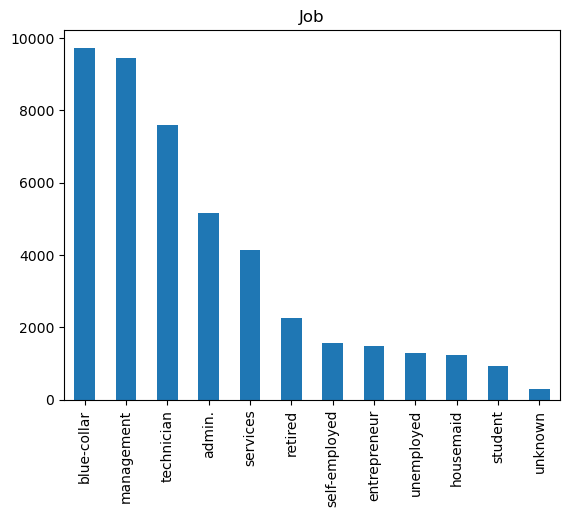

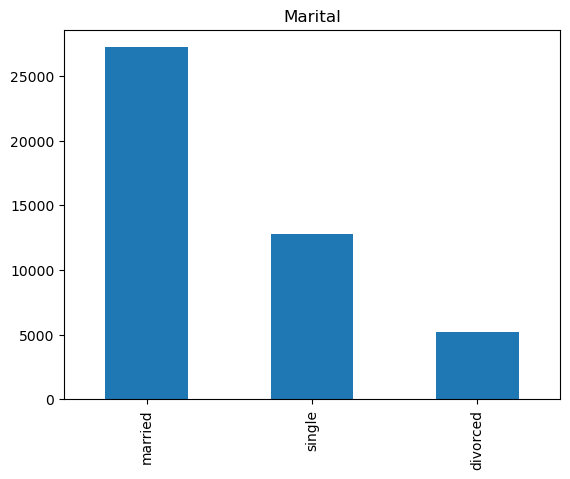

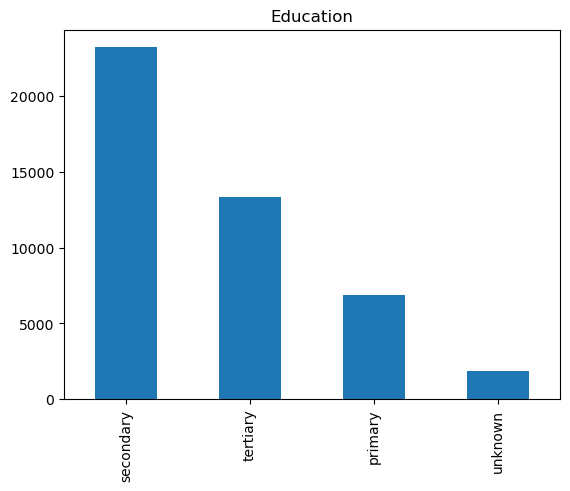

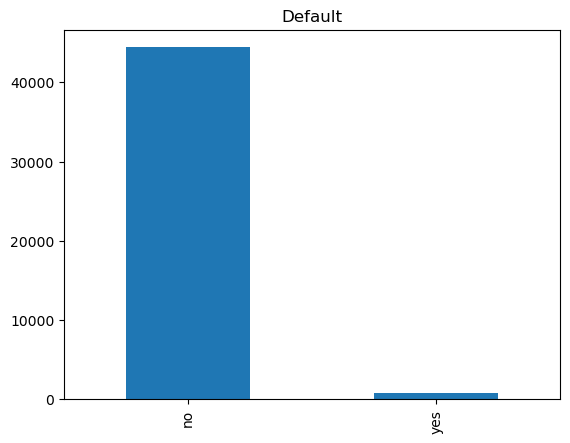

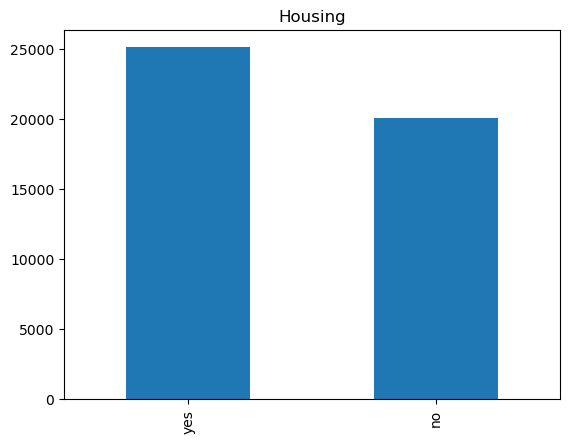

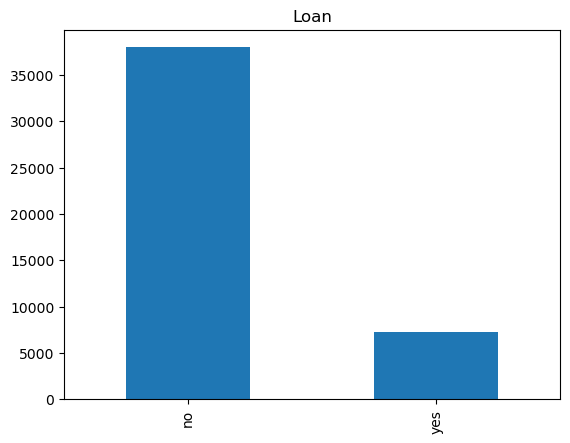

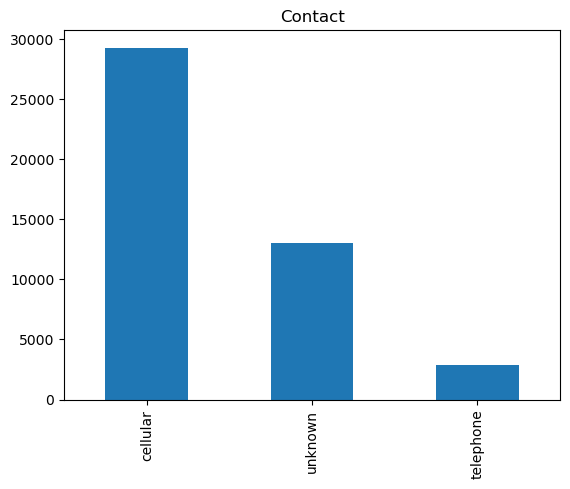

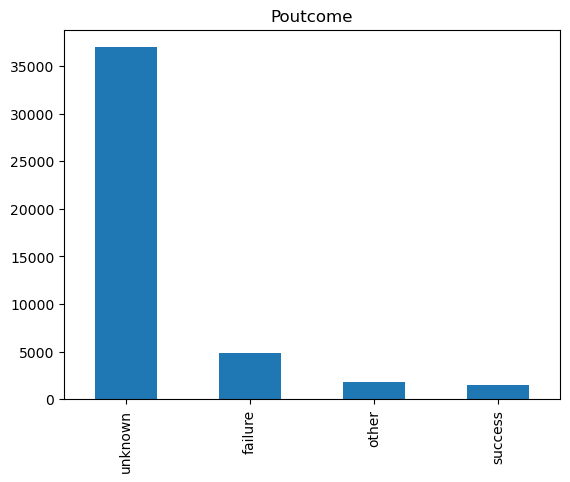

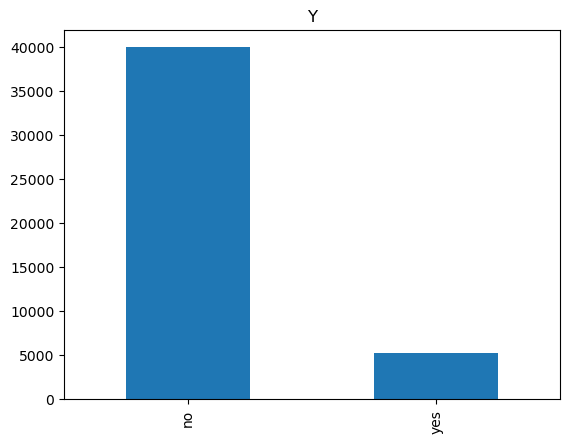

In [34]:
#Process of NA Values

plt.title('Job')
data.job.value_counts().plot(kind='bar')
plt.show()
plt.title('Marital')
data.marital.value_counts().plot(kind='bar')
plt.show()
plt.title('Education')
data.education.value_counts().plot(kind='bar')
plt.show()
plt.title('Default')
data.default.value_counts().plot(kind='bar')  
plt.show()
plt.title('Housing')
data.housing.value_counts().plot(kind='bar')
plt.show()
plt.title('Loan')
data.loan.value_counts().plot(kind='bar')
plt.show()
plt.title('Contact')
data.contact.value_counts().plot(kind='bar')
plt.show()
plt.title('Poutcome')
data.poutcome.value_counts().plot(kind='bar')
plt.show()
plt.title('Y')
data.y.value_counts().plot(kind='bar')
plt.show()


In [35]:
# There is no null value. However there are unknown values as we can see above. 
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [36]:
#unknown values
strings = [x for x in data.columns if type(data[x].loc[data[x].first_valid_index()])==str]

for columns in strings:
  print(columns, ':', len(data[data[columns].str.contains('unknown')]))

job : 288
marital : 0
education : 1857
default : 0
housing : 0
loan : 0
contact : 13020
month : 0
poutcome : 36959
y : 0


In [37]:
data_copy=data

In [43]:
#There are 288 unknown in Job column, 1857 in education, 13020 in contact and 36959 in poutcome
data['job'] = data['job'].replace(['unknown'],np.nan)
data['education'] = data['education'].replace(['unknown'],np.nan)
data['contact'] = data['contact'].replace(['unknown'],np.nan)
data['poutcome'] = data['poutcome'].replace(['unknown'],np.nan)

In [44]:
# method 1 for NA(drop NA)
data=data.dropna()

In [45]:
data.isnull().mean().sum()

0.0

In [50]:
# method 2 for NA(using mode value to fill NA)
data_copy['job'].fillna(data_copy['job'].mode())


0          management
1          technician
2        entrepreneur
3         blue-collar
4                 NaN
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [49]:
data_copy['education'].fillna(data_copy['education'].mode())

0         tertiary
1        secondary
2        secondary
3              NaN
4              NaN
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object

In [52]:
data_copy['contact'].fillna(data_copy['contact'].mode())
data_copy['poutcome'].fillna(data_copy['poutcome'].mode())

0        failure
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
45206        NaN
45207        NaN
45208    success
45209        NaN
45210      other
Name: poutcome, Length: 45211, dtype: object